<a href="https://colab.research.google.com/github/pireshenrique/Porfolio-Ciencia-de-dados/blob/main/Emprestimo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Base de Dados**

https://www.kaggle.com/datasets/ninzaami/loan-predication/data

# **1.2 Informações gerais**

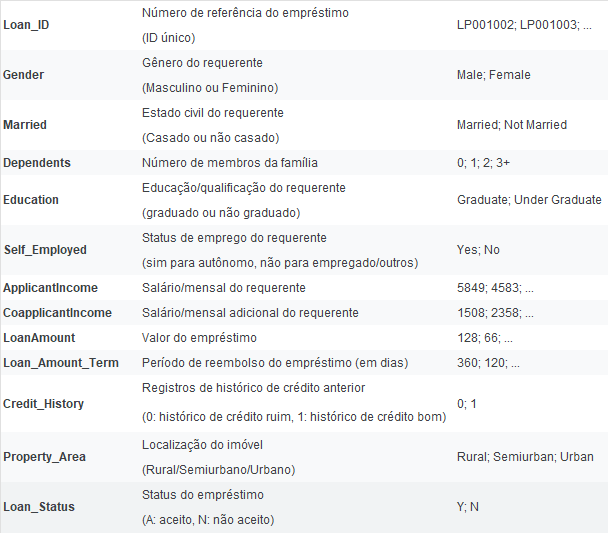

# **2. Analise e Limpeza dos dados**

Importanto bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math
import seaborn as sns
import plotly.express as px
import warnings
# Suprimir todos os avisos
warnings.filterwarnings("ignore")

In [2]:
loan = pd.read_csv('/content/loan_data.csv')

In [3]:
loan.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
loan.shape

(614, 13)

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
nulos = loan[loan.isnull().any(axis=1)]
nulos.shape

(134, 13)

Variavéis Categóricas

In [8]:
# Lista das colunas em que deseja substituir os valores nulos pela moda
colunas_para_substituir = ['Gender', 'Married', 'Dependents','Self_Employed','Credit_History','Loan_Amount_Term' ]

# Itera sobre cada coluna na lista e substitui os valores nulos pela moda
for coluna in colunas_para_substituir:
    moda= loan[coluna].mode()[0]  # Calcula a moda da coluna
    loan[coluna].fillna(moda, inplace=True)  # Substitui os valores nulos pela moda

Foram substituidos, os valores nulos pela moda

Variavéis Numéricas

In [9]:
loan['LoanAmount'].fillna(loan['LoanAmount'].mean(),inplace=True)

Foram substituidos, os valores nulos pela média

In [10]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
# Verificação de linhas duplicadas
id_count = loan['Loan_ID'].value_counts()  # Chama a função para obter os valores contados
id_count .head()

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
Name: Loan_ID, dtype: int64

In [12]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


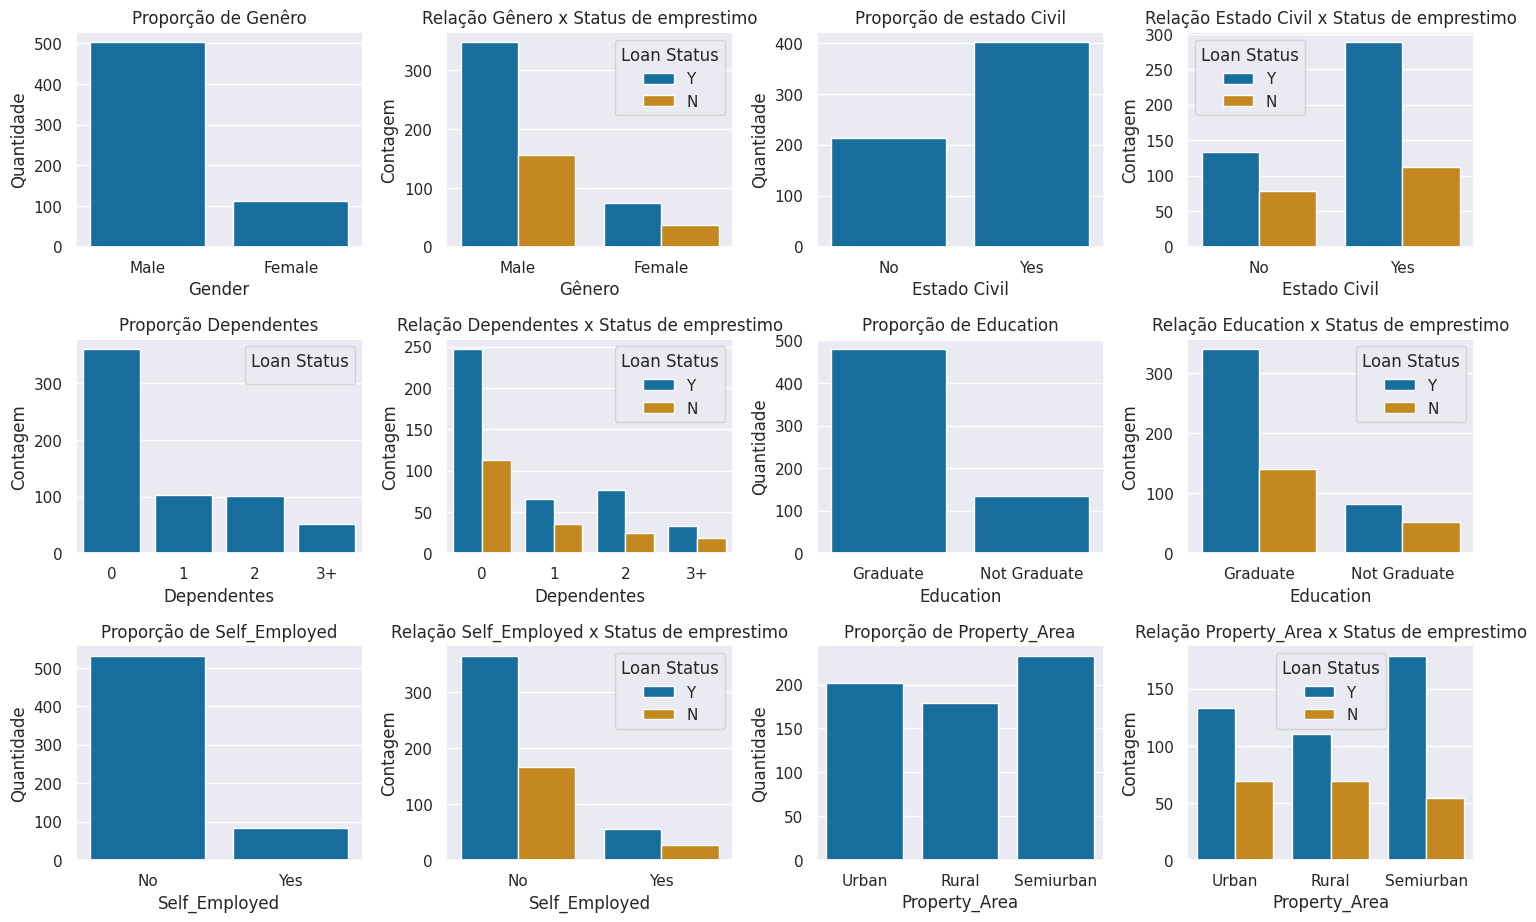

In [13]:
sns.set(style="darkgrid",palette="colorblind")
# Definir o tamanho padrão dos gráficos
plt.figure(figsize=(15, 15))
# Analises para a variavel Genêro
plt.subplot(5,4, 1)
sns.countplot(data=loan, x='Gender')
plt.title('Proporção de Genêro')
plt.xlabel('Gender')
plt.ylabel('Quantidade')

plt.subplot(5, 4, 2)
sns.countplot(x='Gender', hue='Loan_Status', data=loan)
plt.title('Relação Gênero x Status de emprestimo')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='Loan Status')

# Analise da variável Married
plt.subplot(5, 4, 3)
sns.countplot(data=loan, x='Married')
plt.title('Proporção de estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Quantidade')

plt.subplot(5, 4, 4)
sns.countplot(x='Married', hue='Loan_Status', data=loan)
plt.title('Relação Estado Civil x Status de emprestimo')
plt.xlabel('Estado Civil')
plt.ylabel('Contagem')
plt.legend(title='Loan Status')

# Analise da variável Dependents
plt.subplot(5,4, 5)
sns.countplot(x='Dependents', data=loan)
plt.title('Proporção Dependentes')
plt.xlabel('Dependentes')
plt.ylabel('Contagem')
plt.legend(title='Loan Status')

plt.subplot(5, 4, 6)
sns.countplot(x='Dependents', hue='Loan_Status', data=loan)
plt.title('Relação Dependentes x Status de emprestimo')
plt.xlabel('Dependentes')
plt.ylabel('Contagem')
plt.legend(title='Loan Status')

# Analise da variável Education
plt.subplot(5, 4, 7)
sns.countplot(data=loan, x='Education')
plt.title('Proporção de Education')
plt.xlabel('Education')
plt.ylabel('Quantidade')

plt.subplot(5, 4, 8)
sns.countplot(x='Education', hue='Loan_Status', data=loan)
plt.title('Relação Education x Status de emprestimo')
plt.xlabel('Education')
plt.ylabel('Contagem')
plt.legend(title='Loan Status')

# Analise da variável Self_Employed
plt.subplot(5, 4, 9)
sns.countplot(data=loan, x='Self_Employed')
plt.title('Proporção de Self_Employed')
plt.xlabel('Self_Employed')
plt.ylabel('Quantidade')

plt.subplot(5, 4, 10)
sns.countplot(x='Self_Employed', hue='Loan_Status', data=loan)
plt.title('Relação Self_Employed x Status de emprestimo')
plt.xlabel('Self_Employed')
plt.ylabel('Contagem')
plt.legend(title='Loan Status')

# Analise da variável Property_Area
plt.subplot(5, 4, 11)
sns.countplot(data=loan, x='Property_Area')
plt.title('Proporção de Property_Area')
plt.xlabel('Property_Area')
plt.ylabel('Quantidade')

plt.subplot(5, 4, 12)
sns.countplot(x='Property_Area', hue='Loan_Status', data=loan)
plt.title('Relação Property_Area x Status de emprestimo')
plt.xlabel('Property_Area')
plt.ylabel('Contagem')
plt.legend(title='Loan Status')


plt.tight_layout()
plt.show();

Com base nos gráficos apresentados acima, podemos tirar as seguintes conclusões:

	- Na nossa base de dados, tempos uma proporção muito maior entre homens e mulheres, com isso alguns dados podem estar desbalanceados.
	- Pessoas solteiras tem mais possibilidades de terem o crédito aprovado
	- Pessoas sem dependentes possuem mais possibilidade de terem o crédito aprovado
	- Pessoas graduadas possuem mais possibilidade de terem o crédito aprovado
	- Pessoas autônomas possuem menos possibilidade de terem o crédito aprovado

Analisando as variaveis Numéricas

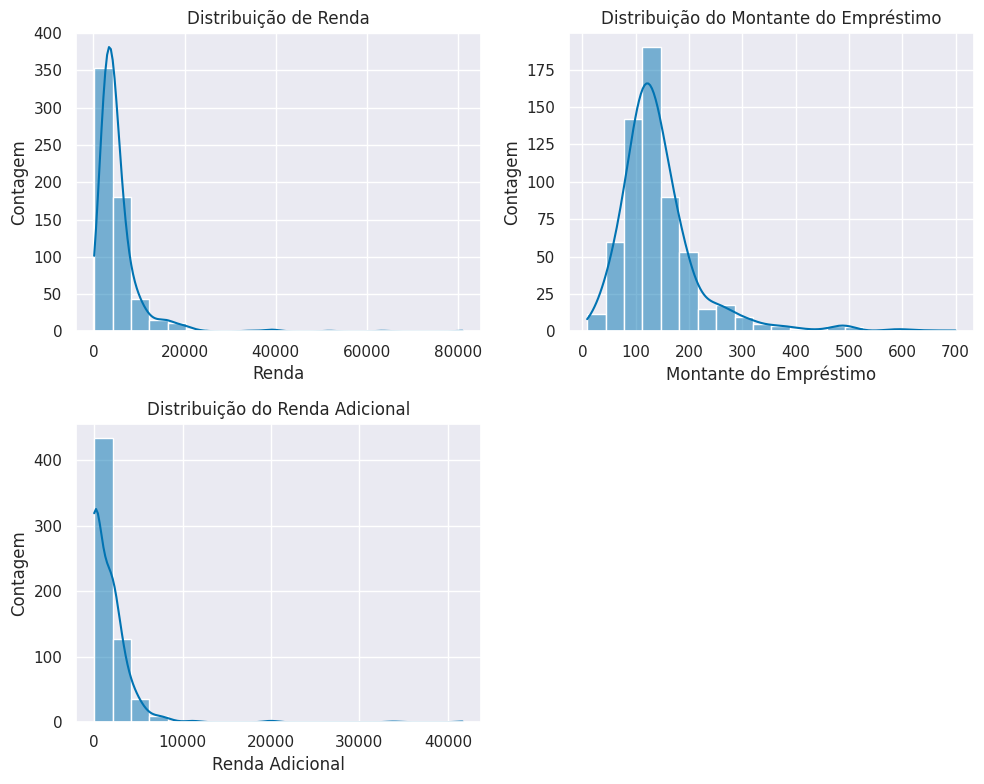

In [14]:
plt.figure(figsize=(10, 8))

# Histograma para a variável 'ApplicantIncome'
plt.subplot(2, 2, 1)
sns.histplot(loan['ApplicantIncome'], bins=20, kde=True)
plt.title('Distribuição de Renda')
plt.xlabel('Renda')
plt.ylabel('Contagem')

# Histograma para a variável 'LoanAmount'
plt.subplot(2, 2, 2)
sns.histplot(loan['LoanAmount'], bins=20, kde=True)
plt.title('Distribuição do Montante do Empréstimo')
plt.xlabel('Montante do Empréstimo')
plt.ylabel('Contagem')

# Histograma para a variável 'CoapplicantIncome'
plt.subplot(2, 2, 3)
sns.histplot(loan['CoapplicantIncome'], bins=20, kde=True)
plt.title('Distribuição do Renda Adicional')
plt.xlabel('Renda Adicional')
plt.ylabel('Contagem')


plt.tight_layout()
plt.show()

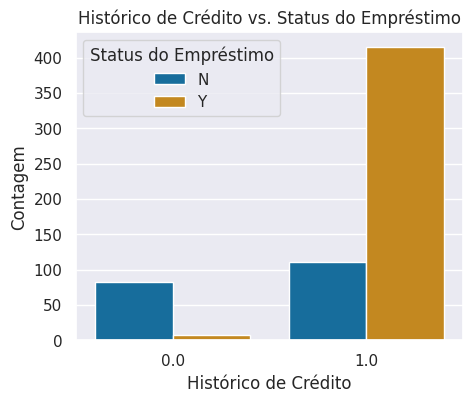

In [15]:
plt.figure(figsize=(5, 4))
sns.countplot(x='Credit_History', hue='Loan_Status', data=loan)
plt.title('Histórico de Crédito vs. Status do Empréstimo')
plt.xlabel('Histórico de Crédito')
plt.ylabel('Contagem')
plt.legend(title='Status do Empréstimo')
plt.show()

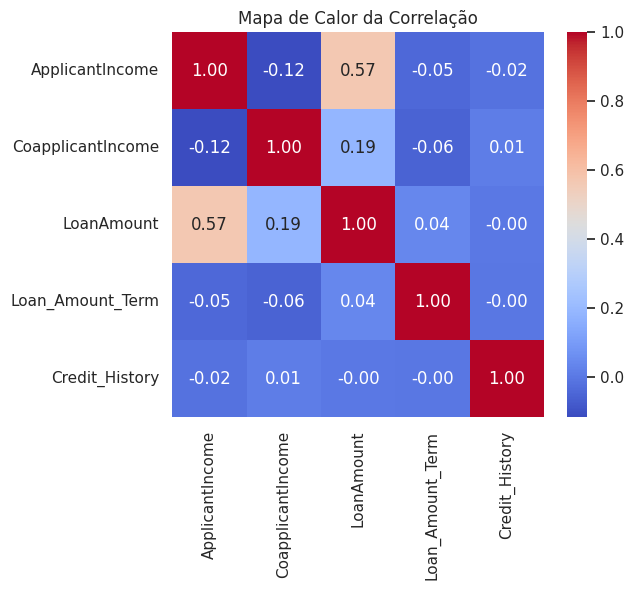

In [16]:
# Heatmap para visualizar a correlação entre variáveis numéricas
plt.figure(figsize=(6, 5))
sns.heatmap(loan.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor da Correlação')
plt.show()

**ApplicantIncome vs. CoapplicantIncome:** Existe uma correlação negativa muito fraca entre a renda e a renda adicional.

**ApplicantIncome vs. LoanAmount:** Existe uma correlação moderada positiva entre a renda  e o montante do empréstimo. Isso sugere que, em geral, à medida que a renda do solicitante aumenta, o montante do empréstimo também tende a aumentar.

**ApplicantIncome vs. Loan_Amount_Term:** Existe uma correlação muito fraca e negativa entre a renda e o prazo do empréstimo. Isso indica que a renda do solicitante tem uma relação muito fraca com o prazo do empréstimo.

**ApplicantIncome vs. Credit_History:** Existe uma correlação muito fraca e negativa entre a renda e o histórico de crédito. Isso sugere que a renda tem uma relação muito fraca com o histórico de crédito.

**CoapplicantIncome vs. LoanAmount:** Existe uma correlação muito fraca e positiva entre a renda adicional e o montante do empréstimo. Isso indica que a renda adicional e tem uma relação muito fraca com o montante do empréstimo.

**CoapplicantIncome vs. Loan_Amount_Term:** Existe uma correlação muito fraca e negativa entre a renda adicional e o prazo do empréstimo. Isso sugere que a renda adicional tem uma relação muito fraca com o prazo do empréstimo.

**CoapplicantIncome vs. Credit_History:** Existe uma correlação muito fraca e positiva entre a renda adicional e o histórico de crédito. Isso sugere que a renda adicional tem uma relação muito fraca com o histórico de crédito.

**LoanAmount vs. Loan_Amount_Term:** Existe uma correlação muito fraca e positiva entre o montante do empréstimo e o prazo do empréstimo. Isso sugere que o montante do empréstimo tem uma relação muito fraca com o prazo do empréstimo.

**LoanAmount vs. Credit_History:** Existe uma correlação muito fraca e negativa entre o montante do empréstimo e o histórico de crédito. Isso sugere que o montante do empréstimo tem uma relação muito fraca com o histórico de crédito.

**Loan_Amount_Term vs. Credit_History:** Existe uma correlação muito fraca e negativa entre o prazo do empréstimo e o histórico de crédito. Isso sugere que o prazo do empréstimo tem uma relação muito fraca com o histórico de crédito.

<Figure size 800x600 with 0 Axes>

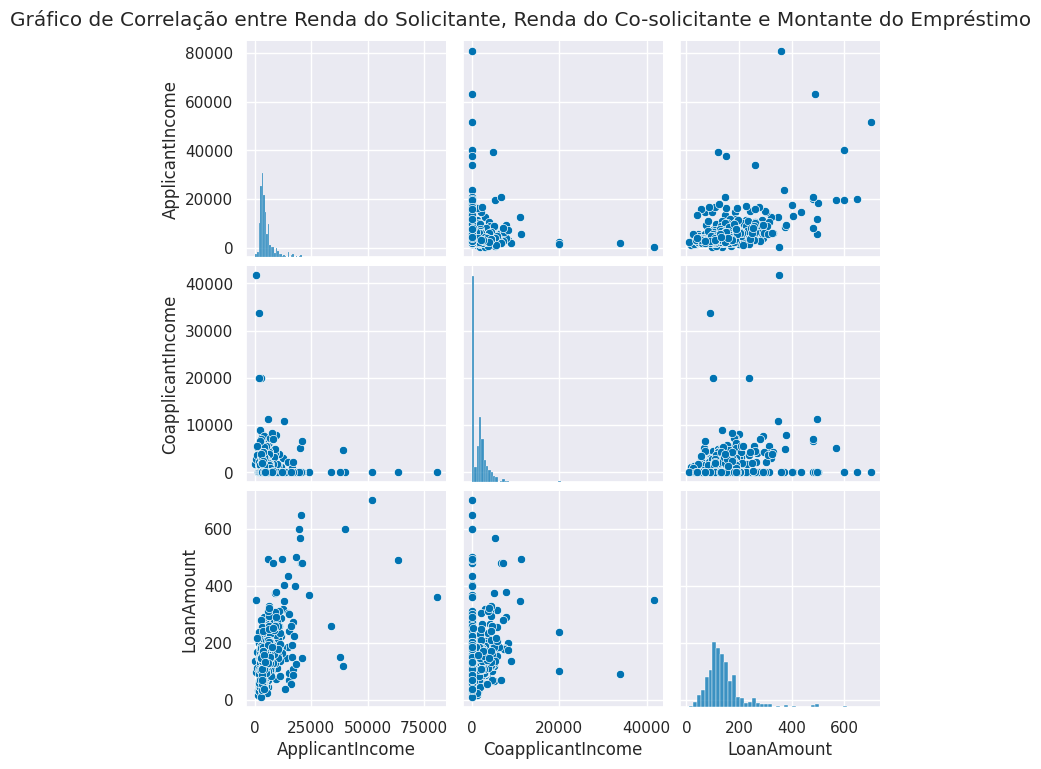

In [17]:
# Gráfico de Correlação para 'ApplicantIncome', 'CoapplicantIncome' e 'LoanAmount'
plt.figure(figsize=(8, 6))
sns.pairplot(loan[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])
plt.suptitle('Gráfico de Correlação entre Renda do Solicitante, Renda do Co-solicitante e Montante do Empréstimo', y=1.02)
plt.show()

# **Pré- Processamento dos dados**

In [18]:
loan.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [19]:
colunas_categoricas = loan[['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']]
colunas_categoricas

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [20]:
from sklearn.preprocessing import LabelEncoder

df1 = loan.copy()
# Cria uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Itera sobre as colunas categóricas e aplica o LabelEncoder
for coluna in colunas_categoricas:
    df1[coluna] = label_encoder.fit_transform(loan[coluna])


In [21]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


<Axes: xlabel='Loan_Status', ylabel='count'>

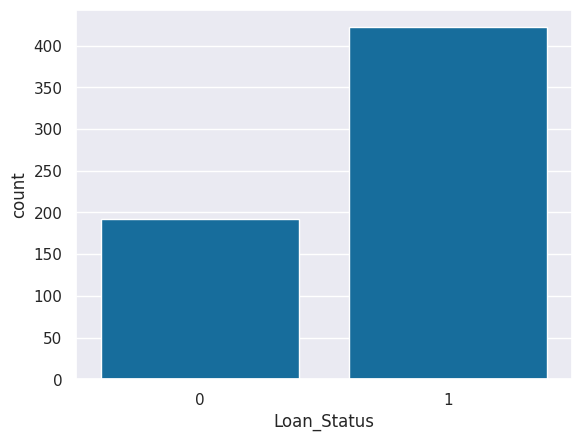

In [22]:
sns.countplot(x='Loan_Status', data=df1)

In [23]:
X = df1.drop('Loan_ID', axis=1)
X = X.drop('Loan_Status', axis=1)
y = df1['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [24]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)
X

array([[1.        , 0.        , 0.        , ..., 0.74358974, 1.        ,
        1.        ],
       [1.        , 1.        , 0.33333333, ..., 0.74358974, 1.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.74358974, 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.33333333, ..., 0.74358974, 1.        ,
        1.        ],
       [1.        , 1.        , 0.66666667, ..., 0.74358974, 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.74358974, 0.        ,
        0.5       ]])

In [25]:
X.shape

(614, 11)

In [26]:
from imblearn.over_sampling import SMOTE

# Suponha que você tenha seus dados X (variáveis independentes) e y (variável de destino)
# X = ... (seus dados independentes)
# y = ... (sua variável de destino)

# Crie uma instância do SMOTE
smote = SMOTE()

# Ajuste e transforme os dados para aplicar o SMOTE
X_S, y_S = smote.fit_resample(X, y)


# **Definindo Modelo Preditivo**

In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, log_loss, jaccard_score

Regrassão Logistica

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=26)
modelo_logistico = LogisticRegression()
modelo_logistico.fit(X_treinamento, y_treinamento)
y_pred_log = modelo_logistico.predict(X_teste)
y_proba_log = modelo_logistico.predict_proba(X_teste)[:, 1]

In [30]:
# Calcular as métricas
acuracia_log = accuracy_score(y_teste, y_pred_log)
precisao_log = precision_score(y_teste, y_pred_log)
recall_log = recall_score(y_teste, y_pred_log)
f1_log = f1_score(y_teste, y_pred_log)
matrix_conf_log = confusion_matrix(y_teste, y_pred_log)
roc_auc_log = roc_auc_score(y_teste, y_proba_log)
fpr, tpr, thresholds = roc_curve(y_teste, y_proba_log)

# Exibir as métricas
print("Acurácia:", acuracia_log)
print("Precisão:", precisao_log)
print("Revocação:", recall_log)
print("F1-Score:", f1_log)
print("Matriz de Confusão:")
print(matrix_conf_log)
print("Área sob a curva ROC:", roc_auc_log)


Acurácia: 0.8211382113821138
Precisão: 0.8181818181818182
Revocação: 0.9782608695652174
F1-Score: 0.8910891089108911
Matriz de Confusão:
[[11 20]
 [ 2 90]]
Área sob a curva ROC: 0.6630434782608695


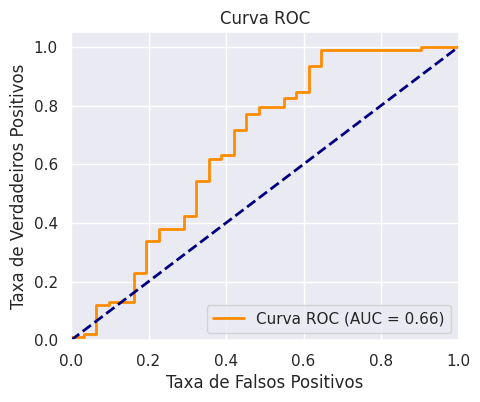

In [31]:
# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_teste, y_proba_log)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [32]:
from sklearn.model_selection import GridSearchCV

# Definir modelo de regressão logística
logreg = LogisticRegression()

# Definir os valores dos hiperparâmetros a serem testados
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter' : [0,500,750,100]
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=10, scoring='accuracy')

# Executar busca em grade usando apenas os dados de treinamento
grid_search.fit(X_treinamento, y_treinamento)

# Visualizar os melhores hiperparâmetros
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)


Melhores hiperparâmetros encontrados:
{'C': 0.01, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}


In [33]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=26)
modelo_logistico = LogisticRegression(C=0.1,max_iter=500,penalty='l1',solver='liblinear')
modelo_logistico.fit(X_treinamento, y_treinamento)
y_pred_log_2 = modelo_logistico.predict(X_teste)
y_proba_log_2 = modelo_logistico.predict_proba(X_teste)[:, 1]

In [34]:
# Calcular as métricas
acuracia_log_2 = accuracy_score(y_teste, y_pred_log_2)
precisao_log_2 = precision_score(y_teste, y_pred_log_2)
recall_log_2 = recall_score(y_teste, y_pred_log_2)
f1_log_2  = f1_score(y_teste, y_pred_log_2)
matrix_conf_log_2 = confusion_matrix(y_teste, y_pred_log_2)
roc_auc_log_2 = roc_auc_score(y_teste, y_proba_log_2)
fpr, tpr, thresholds = roc_curve(y_teste, y_proba_log_2)

# Exibir as métricas
print("Acurácia:", acuracia_log_2)
print("Precisão:", precisao_log_2)
print("Revocação:", recall_log_2)
print("F1-Score:", f1_log_2)
print("Matriz de Confusão:")
print(matrix_conf_log_2)
print("Área sob a curva ROC:", roc_auc_log_2)


Acurácia: 0.8292682926829268
Precisão: 0.8198198198198198
Revocação: 0.9891304347826086
F1-Score: 0.8965517241379309
Matriz de Confusão:
[[11 20]
 [ 1 91]]
Área sob a curva ROC: 0.671984572230014


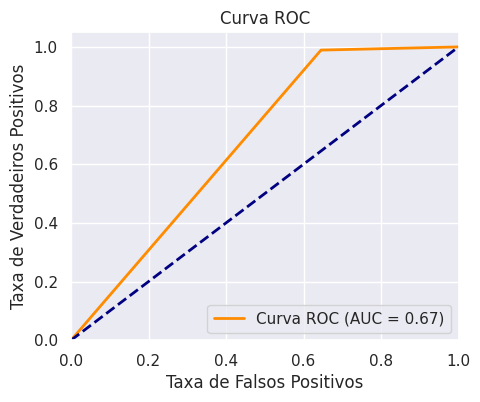

In [35]:
fpr, tpr, thresholds = roc_curve(y_teste, y_proba_log_2)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [36]:
X_treinamento_S, X_teste_S, y_treinamento_S, y_teste_S = train_test_split(X_S, y_S, test_size=0.2, random_state=26)
modelo_logistico = LogisticRegression(C=0.1,max_iter=500,penalty='l1',solver='liblinear')
modelo_logistico.fit(X_treinamento_S, y_treinamento_S)
y_pred_log_S = modelo_logistico.predict(X_teste_S)
y_proba_log_S = modelo_logistico.predict_proba(X_teste_S)[:, 1]

In [37]:
# Calcular as métricas
acuracia_log_S = accuracy_score(y_teste_S, y_pred_log_S)
precisao_log_S = precision_score(y_teste_S, y_pred_log_S)
recall_log_S = recall_score(y_teste_S, y_pred_log_S)
f1_log_S  = f1_score(y_teste_S, y_pred_log_S)
matrix_conf_log_S = confusion_matrix(y_teste_S, y_pred_log_S)
roc_auc_log_S = roc_auc_score(y_teste_S, y_proba_log_S)
fpr, tpr, thresholds = roc_curve(y_teste_S, y_proba_log_S)

# Exibir as métricas
print("Acurácia:", acuracia_log_S)
print("Precisão:", precisao_log_S)
print("Revocação:", recall_log_S)
print("F1-Score:", f1_log_S)
print("Matriz de Confusão:")
print(matrix_conf_log_S)
print("Área sob a curva ROC:", roc_auc_log_S)

Acurácia: 0.6982248520710059
Precisão: 0.631578947368421
Revocação: 0.9767441860465116
F1-Score: 0.7671232876712328
Matriz de Confusão:
[[34 49]
 [ 2 84]]
Área sob a curva ROC: 0.7002661810030821


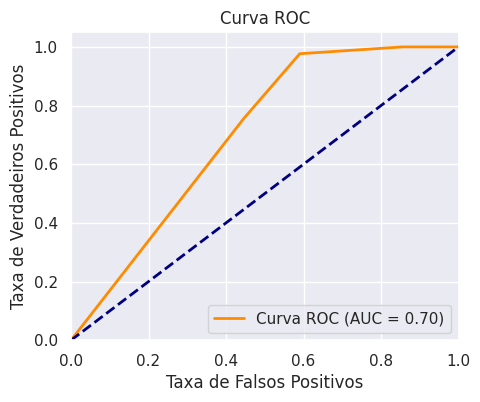

In [38]:
# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_teste_S, y_proba_log_S)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Arvore de decisão

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
modelo_Arvore = DecisionTreeClassifier()
modelo_Arvore.fit(X_treinamento,y_treinamento)
y_pred_arvore = modelo_Arvore.predict(X_teste)
y_proba_arvore = modelo_Arvore.predict_proba(X_teste)[:, 1]

In [41]:
# Calcular as métricas
acuracia_arvore = accuracy_score(y_teste, y_pred_arvore)
precisao_arvore = precision_score(y_teste, y_pred_arvore)
recall_arvore = recall_score(y_teste, y_pred_arvore)
f1_arvore  = f1_score(y_teste, y_pred_arvore)
matrix_conf_arvore = confusion_matrix(y_teste, y_pred_arvore)
roc_auc_arvore = roc_auc_score(y_teste, y_proba_arvore)
fpr, tpr, thresholds = roc_curve(y_teste, y_proba_arvore)

# Exibir as métricas
print("Acurácia:", acuracia_arvore)
print("Precisão:", precisao_arvore)
print("Revocação:", recall_arvore)
print("F1-Score:", f1_arvore)
print("Matriz de Confusão:")
print(matrix_conf_arvore)
print("Área sob a curva ROC:", roc_auc_arvore)

Acurácia: 0.7642276422764228
Precisão: 0.8315789473684211
Revocação: 0.8586956521739131
F1-Score: 0.8449197860962567
Matriz de Confusão:
[[15 16]
 [13 79]]
Área sob a curva ROC: 0.6712833099579243


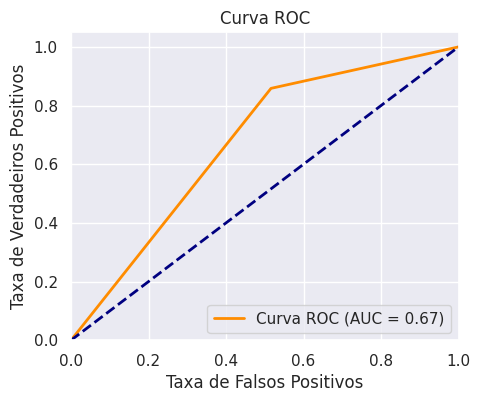

In [42]:
# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_teste, y_proba_arvore)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [43]:
# Definir os valores dos hiperparâmetros a serem testados
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=modelo_Arvore, param_grid=param_grid, cv=10, scoring='accuracy')

# Executar busca em grade usando apenas os dados de treinamento
grid_search.fit(X_treinamento, y_treinamento)

# Visualizar os melhores hiperparâmetros
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

Melhores hiperparâmetros encontrados:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [44]:
modelo_Arvore_2 = DecisionTreeClassifier(criterion ='gini',max_depth=5,min_samples_leaf=2,min_samples_split=2)
modelo_Arvore_2.fit(X_treinamento,y_treinamento)
y_pred_arvore_2 = modelo_Arvore_2.predict(X_teste)
y_proba_arvore_2 = modelo_Arvore_2.predict_proba(X_teste)[:, 1]

In [45]:
# Calcular as métricas
acuracia_arvore_2 = accuracy_score(y_teste, y_pred_arvore_2)
precisao_arvore_2 = precision_score(y_teste, y_pred_arvore_2)
recall_arvore_2 = recall_score(y_teste, y_pred_arvore_2)
f1_arvore_2  = f1_score(y_teste, y_pred_arvore_2)
matrix_conf_arvore_2 = confusion_matrix(y_teste, y_pred_arvore_2)
roc_auc_arvore_2 = roc_auc_score(y_teste, y_proba_arvore_2)
fpr, tpr, thresholds = roc_curve(y_teste, y_proba_arvore_2)

# Exibir as métricas
print("Acurácia:", acuracia_arvore_2)
print("Precisão:", precisao_arvore_2)
print("Revocação:", recall_arvore_2)
print("F1-Score:", f1_arvore_2)
print("Matriz de Confusão:")
print(matrix_conf_arvore_2)
print("Área sob a curva ROC:", roc_auc_arvore_2)

Acurácia: 0.8211382113821138
Precisão: 0.8181818181818182
Revocação: 0.9782608695652174
F1-Score: 0.8910891089108911
Matriz de Confusão:
[[11 20]
 [ 2 90]]
Área sob a curva ROC: 0.69109396914446


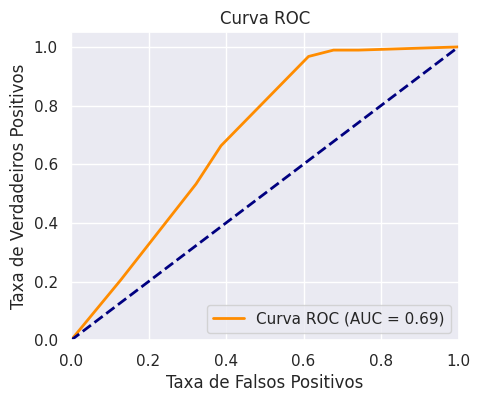

In [46]:
# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_teste, y_proba_arvore_2)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [47]:
modelo_Arvore_S = DecisionTreeClassifier(criterion ='gini',max_depth=5,min_samples_leaf=2,min_samples_split=2)
modelo_Arvore_S.fit(X_treinamento_S,y_treinamento_S)
y_pred_arvore_S = modelo_Arvore_S.predict(X_teste_S)
y_proba_arvore_S = modelo_Arvore_S.predict_proba(X_teste_S)[:, 1]

In [48]:
# Calcular as métricas
acuracia_arvore_S = accuracy_score(y_teste_S, y_pred_arvore_S)
precisao_arvore_S = precision_score(y_teste_S, y_pred_arvore_S)
recall_arvore_S = recall_score(y_teste_S, y_pred_arvore_S)
f1_arvore_S  = f1_score(y_teste_S, y_pred_arvore_S)
matrix_conf_arvore_S = confusion_matrix(y_teste_S, y_pred_arvore_S)
roc_auc_arvore_S = roc_auc_score(y_teste_S, y_proba_arvore_S)
fpr, tpr, thresholds = roc_curve(y_teste_S, y_proba_arvore_S)

# Exibir as métricas
print("Acurácia:", acuracia_arvore_S)
print("Precisão:", precisao_arvore_S)
print("Revocação:", recall_arvore_S)
print("F1-Score:", f1_arvore_S)
print("Matriz de Confusão:")
print(matrix_conf_arvore_S)
print("Área sob a curva ROC:", roc_auc_arvore_S)

Acurácia: 0.7455621301775148
Precisão: 0.6972477064220184
Revocação: 0.8837209302325582
F1-Score: 0.7794871794871796
Matriz de Confusão:
[[50 33]
 [10 76]]
Área sob a curva ROC: 0.8006444382179883


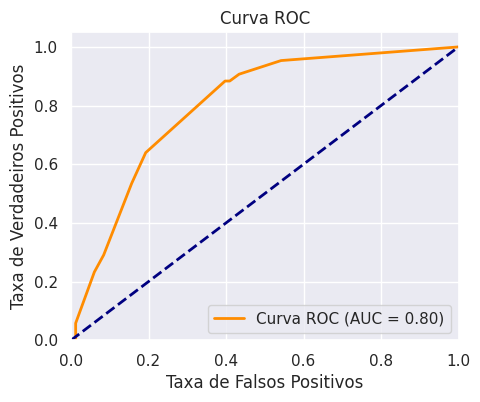

In [49]:
fpr, tpr, thresholds = roc_curve(y_teste_S, y_proba_arvore_S)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Random Florest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
modelo_random = RandomForestClassifier()
modelo_random.fit(X_treinamento,y_treinamento)
y_pred_random = modelo_random.predict(X_teste)
y_proba_random = modelo_random.predict_proba(X_teste)[:, 1]

In [52]:
# Calcular as métricas
acuracia_random = accuracy_score(y_teste, y_pred_random)
precisao_random = precision_score(y_teste, y_pred_random, average='macro')
recall_random = recall_score(y_teste, y_pred_random)
f1_random  = f1_score(y_teste, y_pred_random)
matrix_conf_random = confusion_matrix(y_teste, y_pred_random)
roc_auc_random = roc_auc_score(y_teste, y_proba_random)
fpr, tpr, thresholds = roc_curve(y_teste, y_proba_random)

# Exibir as métricas
print("Acurácia:", acuracia_random)
print("Precisão:", precisao_random)
print("Revocação:", recall_random)
print("F1-Score:", f1_random)
print("Matriz de Confusão:")
print(matrix_conf_random)
print("Área sob a curva ROC:", roc_auc_random)

Acurácia: 0.8130081300813008
Precisão: 0.8011140235910879
Revocação: 0.967391304347826
F1-Score: 0.8855721393034827
Matriz de Confusão:
[[11 20]
 [ 3 89]]
Área sob a curva ROC: 0.6737377279102384


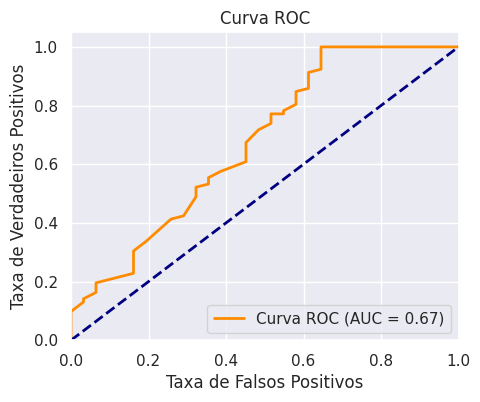

In [53]:
fpr, tpr, thresholds = roc_curve(y_teste, y_proba_random)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [54]:
# Definir os valores dos hiperparâmetros a serem testados
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árvores na floresta
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=modelo_random, param_grid=param_grid, cv=10, scoring='accuracy')

# Executar busca em grade usando apenas os dados de treinamento
grid_search.fit(X_treinamento, y_treinamento)

# Visualizar os melhores hiperparâmetros
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

Melhores hiperparâmetros encontrados:
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [55]:
modelo_random_2 = RandomForestClassifier(bootstrap=True,criterion='entropy',max_depth=None,max_features='sqrt',min_samples_leaf=4,min_samples_split=2,n_estimators=100)
modelo_random_2.fit(X_treinamento,y_treinamento)
y_pred_random_2 = modelo_random_2.predict(X_teste)
y_proba_random_2 = modelo_random_2.predict_proba(X_teste)[:, 1]

In [56]:
acuracia_random_2 = accuracy_score(y_teste, y_pred_random_2)
precisao_random_2 = precision_score(y_teste, y_pred_random_2)
recall_random_2 = recall_score(y_teste, y_pred_random_2)
f1_random_2  = f1_score(y_teste, y_pred_random_2)
matrix_conf_random_2 = confusion_matrix(y_teste, y_pred_random_2)
roc_auc_random_2 = roc_auc_score(y_teste, y_proba_random_2)
fpr, tpr, thresholds = roc_curve(y_teste, y_proba_random_2)

# Exibir as métricas
print("Acurácia:", acuracia_random_2)
print("Precisão:", precisao_random_2)
print("Revocação:", recall_random_2)
print("F1-Score:", f1_random_2)
print("Matriz de Confusão:")
print(matrix_conf_random_2)
print("Área sob a curva ROC:", roc_auc_random_2)

Acurácia: 0.8292682926829268
Precisão: 0.8198198198198198
Revocação: 0.9891304347826086
F1-Score: 0.8965517241379309
Matriz de Confusão:
[[11 20]
 [ 1 91]]
Área sob a curva ROC: 0.6956521739130435


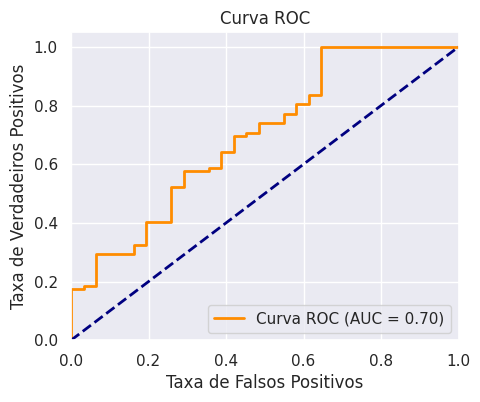

In [57]:
fpr, tpr, thresholds = roc_curve(y_teste, y_proba_random_2)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [58]:
modelo_random_S = RandomForestClassifier(bootstrap=True,criterion='entropy',max_depth=None,max_features='sqrt',min_samples_leaf=4,min_samples_split=2,n_estimators=100)
modelo_random_S.fit(X_treinamento_S,y_treinamento_S)
y_pred_random_S = modelo_random_S.predict(X_teste_S)
y_proba_random_S = modelo_random_S.predict_proba(X_teste_S)[:, 1]

In [59]:
acuracia_random_S = accuracy_score(y_teste_S, y_pred_random_S)
precisao_random_S = precision_score(y_teste_S, y_pred_random_S)
recall_random_S = recall_score(y_teste_S, y_pred_random_S)
f1_random_S  = f1_score(y_teste_S, y_pred_random_S)
matrix_conf_random_S = confusion_matrix(y_teste_S, y_pred_random_S)
roc_auc_random_S = roc_auc_score(y_teste_S, y_proba_random_S)
fpr, tpr, thresholds = roc_curve(y_teste_S, y_proba_random_S)

# Exibir as métricas
print("Acurácia:", acuracia_random_S)
print("Precisão:", precisao_random_S)
print("Revocação:", recall_random_S)
print("F1-Score:", f1_random_S)
print("Matriz de Confusão:")
print(matrix_conf_random_S)
print("Área sob a curva ROC:", roc_auc_random_S)

Acurácia: 0.8047337278106509
Precisão: 0.7572815533980582
Revocação: 0.9069767441860465
F1-Score: 0.8253968253968254
Matriz de Confusão:
[[58 25]
 [ 8 78]]
Área sob a curva ROC: 0.8778369291117959


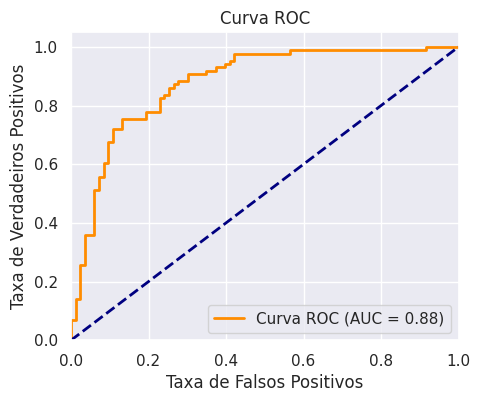

In [60]:
fpr, tpr, thresholds = roc_curve(y_teste_S, y_proba_random_S)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Redes Neurais

In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from tensorflow.keras.utils import to_categorical

# Codificar os rótulos de classe para one-hot encoding
y_encoded = to_categorical(y)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Definir modelo DNN
modelo_DNN = Sequential([
    Dense(64, activation='relu', input_shape=(X_treinamento.shape[1],)),  # Camada de entrada
    Dropout(0.2),  # Regularização por Dropout
    Dense(128, activation='relu'),  # Camada oculta 1
    Dense(64, activation='relu'),   # Camada oculta 2
    Dropout(0.2),  # Regularização por Dropout
    Dense(32, activation='relu'),   # Camada oculta 3
    Dense(2, activation='softmax')  # Ajuste o número de unidades para o número correto de classes
])

# Compilar modelo
modelo_DNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar modelo
modelo_DNN.fit(X_treinamento, y_treinamento, epochs=50, batch_size=32, validation_split=0.2)

# Avaliar modelo
loss, acuracia_DNN = modelo_DNN.evaluate(X_teste, y_teste)
print(f'Acurácia do modelo: {acuracia_DNN}')



Epoch 1/50
13/13 [==============================] - 2s 25ms/step - loss: 0.6556 - accuracy: 0.6301 - val_loss: 0.6022 - val_accuracy: 0.6970
Epoch 2/50
13/13 [==============================] - 0s 6ms/step - loss: 0.5981 - accuracy: 0.6964 - val_loss: 0.5843 - val_accuracy: 0.6970
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.5774 - accuracy: 0.6990 - val_loss: 0.5638 - val_accuracy: 0.7374
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 0.5410 - accuracy: 0.7679 - val_loss: 0.5425 - val_accuracy: 0.7778
Epoch 5/50
13/13 [==============================] - 0s 6ms/step - loss: 0.5407 - accuracy: 0.7883 - val_loss: 0.5219 - val_accuracy: 0.7980
Epoch 6/50
13/13 [==============================] - 0s 6ms/step - loss: 0.5104 - accuracy: 0.8112 - val_loss: 0.4999 - val_accuracy: 0.7980
Epoch 7/50
13/13 [==============================] - 0s 7ms/step - loss: 0.4883 - accuracy: 0.8112 - val_loss: 0.4833 - val_accuracy: 0.7980
Epoch 8/50
13/13 [=

In [63]:
# Previsões no conjunto de teste (obter probabilidades)
y_pred_prob = modelo_DNN.predict(X_teste)

# Converter as probabilidades em classes previstas
y_pred_DNN = np.argmax(y_pred_prob, axis=1)

# Converter rótulos one-hot encoded de volta para valores de classe
y_teste_classes = np.argmax(y_teste, axis=1)

# Calcular precisão
precisao_DNN = precision_score(y_teste_classes, y_pred_DNN, average='weighted')
print(f'Precisão do modelo: {precisao_DNN}')

# Calcular revocação
recall_DNN = recall_score(y_teste_classes, y_pred_DNN, average='weighted')
print(f'Revocação do modelo: {recall_DNN}')

# Calcular F1-Score
f1_DNN = f1_score(y_teste_classes, y_pred_DNN, average='weighted')
print(f'F1-Score do modelo: {f1_DNN}')

# Calcular matriz de confusão
matrix_conf_DNN = confusion_matrix(y_teste_classes, y_pred_DNN)
print(f'Matriz de Confusão:\n{matrix_conf_DNN}')

# Calcular área sob a curva ROC
roc_auc_DNN = roc_auc_score(y_teste, y_pred_prob, multi_class='ovr')
print(f'Área sob a curva ROC: {roc_auc_DNN}')


4/4 [==============================] - 0s 4ms/step
Precisão do modelo: 0.8252526249958856
Revocação do modelo: 0.7886178861788617
F1-Score do modelo: 0.7614910090194872
Matriz de Confusão:
[[18 25]
 [ 1 79]]
Área sob a curva ROC: 0.7122093023255813


In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from tensorflow.keras.utils import to_categorical

# Codificar os rótulos de classe para one-hot encoding
y_encoded_S = to_categorical(y_S)
X_treinamento_S, X_teste_S, y_treinamento_S, y_teste_S = train_test_split(X_S, y_encoded_S, test_size=0.2, random_state=42)

# Definir modelo DNN
modelo_DNN = Sequential([
    Dense(64, activation='relu', input_shape=(X_treinamento.shape[1],)),  # Camada de entrada
    Dropout(0.2),  # Regularização por Dropout
    Dense(128, activation='relu'),  # Camada oculta 1
    Dense(64, activation='relu'),   # Camada oculta 2
    Dropout(0.2),  # Regularização por Dropout
    Dense(32, activation='relu'),   # Camada oculta 3
    Dense(2, activation='softmax')  # Ajuste o número de unidades para o número correto de classes
])

# Compilar modelo
modelo_DNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar modelo
modelo_DNN.fit(X_treinamento, y_treinamento, epochs=50, batch_size=32, validation_split=0.2)

# Avaliar modelo
loss, acuracia_DNN_S = modelo_DNN.evaluate(X_teste, y_teste)
print(f'Acurácia do modelo: {acuracia_DNN_S}')


Epoch 1/50
13/13 [==============================] - 2s 22ms/step - loss: 0.6166 - accuracy: 0.6505 - val_loss: 0.5736 - val_accuracy: 0.6970
Epoch 2/50
13/13 [==============================] - 0s 6ms/step - loss: 0.5936 - accuracy: 0.6964 - val_loss: 0.5576 - val_accuracy: 0.6970
Epoch 3/50
13/13 [==============================] - 0s 7ms/step - loss: 0.5456 - accuracy: 0.7245 - val_loss: 0.5432 - val_accuracy: 0.7778
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 0.5183 - accuracy: 0.7832 - val_loss: 0.5242 - val_accuracy: 0.7980
Epoch 5/50
13/13 [==============================] - 0s 6ms/step - loss: 0.4871 - accuracy: 0.8112 - val_loss: 0.5095 - val_accuracy: 0.7980
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 0.4853 - accuracy: 0.8061 - val_loss: 0.4982 - val_accuracy: 0.7980
Epoch 7/50
13/13 [==============================] - 0s 5ms/step - loss: 0.4707 - accuracy: 0.8087 - val_loss: 0.4876 - val_accuracy: 0.7980
Epoch 8/50
13/13 [=

In [65]:
# Previsões no conjunto de teste (obter probabilidades)
y_pred_prob_S = modelo_DNN.predict(X_teste_S)

# Converter as probabilidades em classes previstas
y_pred_DNN_S = np.argmax(y_pred_prob_S, axis=1)

# Converter rótulos one-hot encoded de volta para valores de classe
y_teste_classes_S = np.argmax(y_teste_S, axis=1)

# Calcular precisão
precisao_DNN_S = precision_score(y_teste_classes_S, y_pred_DNN_S, average='weighted')
print(f'Precisão do modelo: {precisao_DNN_S}')

# Calcular revocação
recall_DNN_S = recall_score(y_teste_classes_S, y_pred_DNN_S, average='weighted')
print(f'Revocação do modelo: {recall_DNN_S}')

# Calcular F1-Score
f1_DNN_S = f1_score(y_teste_classes_S, y_pred_DNN_S, average='weighted')
print(f'F1-Score do modelo: {f1_DNN_S}')

# Calcular matriz de confusão
matrix_conf_DNN_S = confusion_matrix(y_teste_classes_S, y_pred_DNN_S)
print(f'Matriz de Confusão:\n{matrix_conf_DNN_S}')

# Calcular área sob a curva ROC
roc_auc_DNN_S = roc_auc_score(y_teste_S, y_pred_prob_S, multi_class='ovr')
print(f'Área sob a curva ROC: {roc_auc_DNN_S}')

6/6 [==============================] - 0s 3ms/step
Precisão do modelo: 0.7927541303471825
Revocação do modelo: 0.6863905325443787
F1-Score do modelo: 0.6697242544937022
Matriz de Confusão:
[[43 51]
 [ 2 73]]
Área sob a curva ROC: 0.7760283687943261


# Comparando os Modelos

**Acurácia:** A acurácia mede a proporção de previsões corretas em relação ao total de previsões. Um modelo com alta acurácia é bom, mas pode ser enganoso se os dados estiverem desbalanceados.

In [66]:
print('Acurácia Regressão Logistica:', acuracia_log)
print('Acurácia Regressão Logistica Ajustada:', acuracia_log_2)
print('Acurácia Regressão Logistica Smote:', acuracia_log_S)
print('Acurácia Arvore de Decisão:', acuracia_arvore)
print('Acurácia Arvore de Decisão Ajustada:', acuracia_arvore_2)
print('Acurácia Arvore de Decisão Smote:', acuracia_arvore_S)
print('Acurácia Random Florest:', acuracia_random)
print('Acurácia Random Florest Ajustada:', acuracia_random_2)
print('Acurácia Random Florest Smote:', acuracia_random_S)
print('Acurácia Redes Neurais DNN:', acuracia_DNN)
print('Acurácia Redes Neurais DNN SMOTE:', acuracia_DNN_S)

Acurácia Regressão Logistica: 0.8211382113821138
Acurácia Regressão Logistica Ajustada: 0.8292682926829268
Acurácia Regressão Logistica Smote: 0.6982248520710059
Acurácia Arvore de Decisão: 0.7642276422764228
Acurácia Arvore de Decisão Ajustada: 0.8211382113821138
Acurácia Arvore de Decisão Smote: 0.7455621301775148
Acurácia Random Florest: 0.8130081300813008
Acurácia Random Florest Ajustada: 0.8292682926829268
Acurácia Random Florest Smote: 0.8047337278106509
Acurácia Redes Neurais DNN: 0.7886179089546204
Acurácia Redes Neurais DNN SMOTE: 0.7804877758026123


**Precisão:** A precisão mede a proporção de verdadeiros positivos entre as previsões positivas feitas pelo modelo. Uma alta precisão indica que o modelo não classifica erroneamente muitas instâncias negativas como positivas.

In [67]:
print('Precisão Regressão Logistica:', precisao_log)
print('Precisão Regressão Logistica Ajustada:', precisao_log_2)
print('Precisão Regressão Logistica Smote:', precisao_log_S)
print('Precisão Arvore de Decisão:', precisao_arvore)
print('Precisão Arvore de Decisão Ajustada:', precisao_arvore_2)
print('Precisão Arvore de Decisão Smote:', precisao_arvore_S)
print('Precisão Random Florest:', precisao_random)
print('Precisão Random Florest Ajustada:', precisao_random_2)
print('Precisão Random Florest Smote:', precisao_random_S)
print('Precisão Redes Neurais DNN:', precisao_DNN)
print('Precisão Redes Neurais DNN Smote:', precisao_DNN_S)

Precisão Regressão Logistica: 0.8181818181818182
Precisão Regressão Logistica Ajustada: 0.8198198198198198
Precisão Regressão Logistica Smote: 0.631578947368421
Precisão Arvore de Decisão: 0.8315789473684211
Precisão Arvore de Decisão Ajustada: 0.8181818181818182
Precisão Arvore de Decisão Smote: 0.6972477064220184
Precisão Random Florest: 0.8011140235910879
Precisão Random Florest Ajustada: 0.8198198198198198
Precisão Random Florest Smote: 0.7572815533980582
Precisão Redes Neurais DNN: 0.8252526249958856
Precisão Redes Neurais DNN Smote: 0.7927541303471825


**Recall:** A revocação mede a proporção de verdadeiros positivos que foram corretamente identificados pelo modelo. Uma alta revocação indica que o modelo é capaz de encontrar a maioria dos verdadeiros positivos.

In [68]:
print('Recall Regressão Logistica:', recall_log)
print('Recall Regressão Logistica Ajustada:', recall_log_2)
print('Recall Regressão Logistica Smote:', recall_log_S)
print('Recall Arvore de Decisão:', recall_arvore)
print('Recall Arvore de Decisão Ajustada:', recall_arvore_2)
print('Recall Arvore de Decisão Smote:', recall_arvore_S)
print('Recall Random Florest:', recall_random)
print('Recall Random Florest Ajustada:', recall_random_2)
print('Recall Random Florest Smote:', recall_random_S)
print('Recall Redes Neurais DNN:', recall_DNN)
print('Recall Redes Neurais DNN Smote:', recall_DNN_S)

Recall Regressão Logistica: 0.9782608695652174
Recall Regressão Logistica Ajustada: 0.9891304347826086
Recall Regressão Logistica Smote: 0.9767441860465116
Recall Arvore de Decisão: 0.8586956521739131
Recall Arvore de Decisão Ajustada: 0.9782608695652174
Recall Arvore de Decisão Smote: 0.8837209302325582
Recall Random Florest: 0.967391304347826
Recall Random Florest Ajustada: 0.9891304347826086
Recall Random Florest Smote: 0.9069767441860465
Recall Redes Neurais DNN: 0.7886178861788617
Recall Redes Neurais DNN Smote: 0.6863905325443787


**F1-Score:** é a média harmônica da precisão e da revocação. Ele fornece um equilíbrio entre precisão e revocação.

In [69]:
print('F1 Score Regressão Logistica:', f1_log)
print('F1 Score Regressão Logistica Ajustada:', f1_log_2)
print('F1 Score Regressão Logistica Smote:', f1_log_S)
print('F1 Score Arvore de Decisão:', f1_arvore)
print('F1 Score Arvore de Decisão Ajustada:', f1_arvore_2)
print('F1 Score Arvore de Decisão Smote:', f1_arvore_S)
print('F1 Score Random Florest:', f1_random)
print('F1 Score Random Florest Ajustada:', f1_random_2)
print('F1 Score Random Florest Smote:', f1_random_2)
print('F1 Score Redes Neurais DNN:', f1_DNN)
print('F1 Score Redes Neurais DNN Smote:', f1_DNN_S)

F1 Score Regressão Logistica: 0.8910891089108911
F1 Score Regressão Logistica Ajustada: 0.8965517241379309
F1 Score Regressão Logistica Smote: 0.7671232876712328
F1 Score Arvore de Decisão: 0.8449197860962567
F1 Score Arvore de Decisão Ajustada: 0.8910891089108911
F1 Score Arvore de Decisão Smote: 0.7794871794871796
F1 Score Random Florest: 0.8855721393034827
F1 Score Random Florest Ajustada: 0.8965517241379309
F1 Score Random Florest Smote: 0.8965517241379309
F1 Score Redes Neurais DNN: 0.7614910090194872
F1 Score Redes Neurais DNN Smote: 0.6697242544937022


**Matriz de Confusão:** A matriz de confusão fornece uma visão detalhada do desempenho do modelo, mostrando o número de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.

In [70]:
print('Matriz de Confusão Regressão Logistica:\n', matrix_conf_log)
print('Matriz de Confusão Regressão Logistica Ajustada:\n', matrix_conf_log_2)
print('Matriz de Confusão Regressão Logistica Smote:\n', matrix_conf_log_S)
print('Matriz de Confusão Arvore de Decisão:\n', matrix_conf_arvore)
print('Matriz de Confusão Arvore de Decisão Ajustada:\n', matrix_conf_arvore_2)
print('Matriz de Confusão Arvore de Decisão Smote:\n', matrix_conf_arvore_S)
print('Matriz de Confusão Random Florest:\n', matrix_conf_random)
print('Matriz de Confusão Random Florest Ajustada:\n', matrix_conf_random_2)
print('Matriz de Confusão Random Florest Smote:\n', matrix_conf_random_S)
print('Matriz de Confusão Redes Neurais DNN:\n', matrix_conf_DNN)
print('Matriz de Confusão Redes Neurais DNN Smote:\n', matrix_conf_DNN_S)

Matriz de Confusão Regressão Logistica:
 [[11 20]
 [ 2 90]]
Matriz de Confusão Regressão Logistica Ajustada:
 [[11 20]
 [ 1 91]]
Matriz de Confusão Regressão Logistica Smote:
 [[34 49]
 [ 2 84]]
Matriz de Confusão Arvore de Decisão:
 [[15 16]
 [13 79]]
Matriz de Confusão Arvore de Decisão Ajustada:
 [[11 20]
 [ 2 90]]
Matriz de Confusão Arvore de Decisão Smote:
 [[50 33]
 [10 76]]
Matriz de Confusão Random Florest:
 [[11 20]
 [ 3 89]]
Matriz de Confusão Random Florest Ajustada:
 [[11 20]
 [ 1 91]]
Matriz de Confusão Random Florest Smote:
 [[58 25]
 [ 8 78]]
Matriz de Confusão Redes Neurais DNN:
 [[18 25]
 [ 1 79]]
Matriz de Confusão Redes Neurais DNN Smote:
 [[43 51]
 [ 2 73]]


**Área sob a curva ROC (ROC-AUC):** A área sob a curva ROC é uma medida da capacidade de discriminação do modelo em diferentes limiares de classificação. Quanto maior a área sob a curva, melhor é o desempenho do modelo.

In [71]:
print('Área sob a curva ROC Regressão Logistica:', roc_auc_log)
print('Área sob a curva ROC Regressão Logistica Ajustada:', roc_auc_log_2)
print('Área sob a curva ROC Regressão Logistica Smote:', roc_auc_log_S)
print('Área sob a curva ROC Arvore de Decisão:', roc_auc_arvore)
print('Área sob a curva ROC Arvore de Decisão Ajustada:', roc_auc_arvore_2)
print('Área sob a curva ROC Arvore de Decisão Smote:', roc_auc_arvore_S)
print('Área sob a curva ROC Random Florest:', roc_auc_random)
print('Área sob a curva ROC Random Florest Ajustada:', roc_auc_random_2)
print('Área sob a curva ROC Random Florest Smote:', roc_auc_random_S)
print('Área sob a curva ROC Redes Neurais DNN:', roc_auc_DNN)
print('Área sob a curva ROC Redes Neurais DNN Smote:', roc_auc_DNN_S)


Área sob a curva ROC Regressão Logistica: 0.6630434782608695
Área sob a curva ROC Regressão Logistica Ajustada: 0.671984572230014
Área sob a curva ROC Regressão Logistica Smote: 0.7002661810030821
Área sob a curva ROC Arvore de Decisão: 0.6712833099579243
Área sob a curva ROC Arvore de Decisão Ajustada: 0.69109396914446
Área sob a curva ROC Arvore de Decisão Smote: 0.8006444382179883
Área sob a curva ROC Random Florest: 0.6737377279102384
Área sob a curva ROC Random Florest Ajustada: 0.6956521739130435
Área sob a curva ROC Random Florest Smote: 0.8778369291117959
Área sob a curva ROC Redes Neurais DNN: 0.7122093023255813
Área sob a curva ROC Redes Neurais DNN Smote: 0.7760283687943261


A Random Forest Ajustada parece ter o melhor desempenho, pois possui uma alta precisão, recall e F1-Score, além de uma área sob a curva ROC relativamente alta.